# Bivariate Exploratory Data Analysis (EDA)

Bivariate EDA involves exploring the relationship between two variables to identify patterns, correlations, and anomalies. In this notebook, we will use the **Automobile** dataset to demonstrate these techniques using **Seaborn** and **Pandas**.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)

## 1. Data Loading and Cleaning

In [2]:
# Load dataset
df = pd.read_csv("./datasets/automobile.csv")

# Display first few rows
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


The dataset contains '?' characters representing missing values. We will convert these '?' to NaN, convert the columns to numeric types, and then fill the missing values with the column mean.

In [ ]:
# Columns to clean
cols_to_clean = ['price', 'horsepower', 'normalized-losses']

# Convert to numeric, coercing errors ('?') to NaN
for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaNs with the mean of each column
#df['price'] = df['price'].fillna(df['price'].mean())
df[cols_to_clean] = df[cols_to_clean].fillna(df[cols_to_clean].mean())

# Verify the changes
df[cols_to_clean].info()

<class 'pandas.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              205 non-null    float64
 1   horsepower         205 non-null    float64
 2   normalized-losses  205 non-null    float64
dtypes: float64(3)
memory usage: 4.9 KB


## 2. Scatter Plot (Numerical vs. Numerical)
Scatter plots are the most common way to visualize the relationship between two continuous variables.

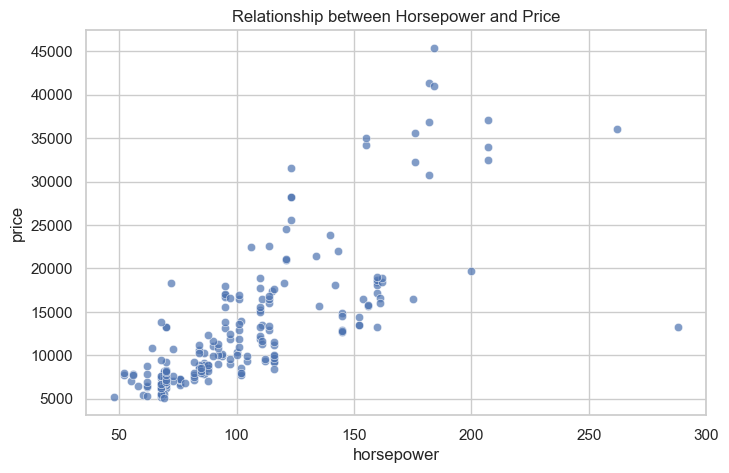

In [4]:
# Scatter plot: Horsepower vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='horsepower', y='price', alpha=0.7)
plt.title("Relationship between Horsepower and Price")
plt.show()

## 3. Box Plot (Categorical vs. Numerical)
Box plots show the distribution of a quantitative variable across different levels of a categorical variable.

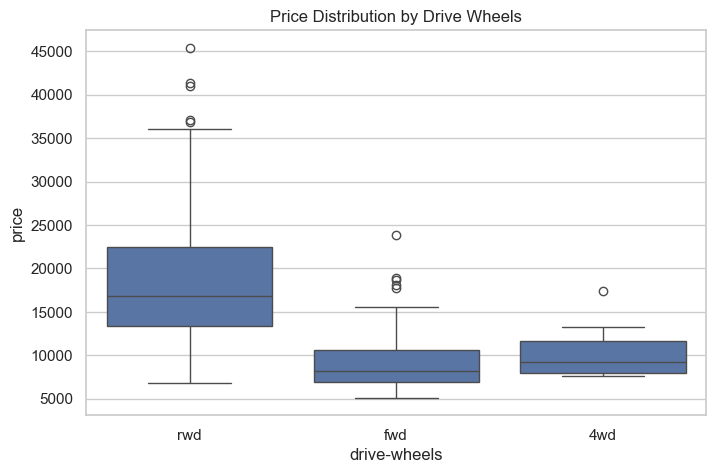

In [5]:
# Boxplot: Price distribution by Drive Wheels
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='drive-wheels', y='price')
plt.title("Price Distribution by Drive Wheels")
plt.show()

## 4. Joint Plot (Bivariate + Univariate)
A joint plot combines a scatter plot (to show the relationship) with histograms/density plots (to show individual distributions).

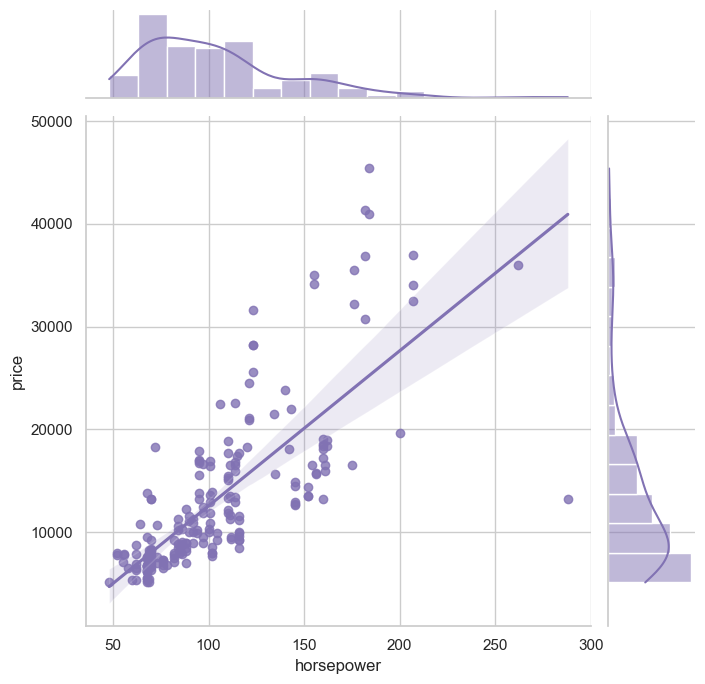

In [6]:
# Joint Plot showing regression line and distributions
sns.jointplot(data=df, x='horsepower', y='price', kind='reg', height=7, color='m')
plt.show()

## 5. Correlation Heatmap
A heatmap helps visualize the strength of correlations between multiple numerical variables at once.

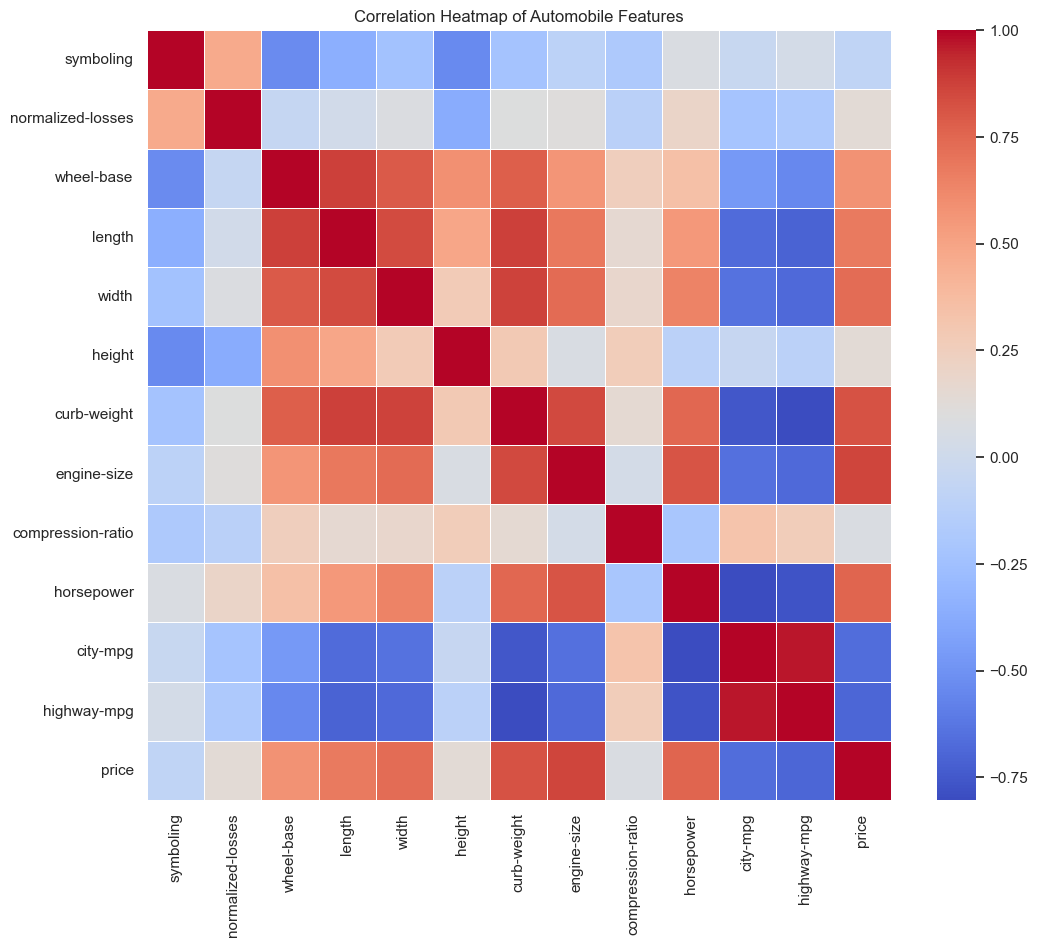

In [7]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Draw Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Automobile Features")
plt.show()

## 6. Pair Plot (Multivariate)
A pair plot visualizes pairwise relationships in a dataset. It is a great way to spot trends among multiple variables.

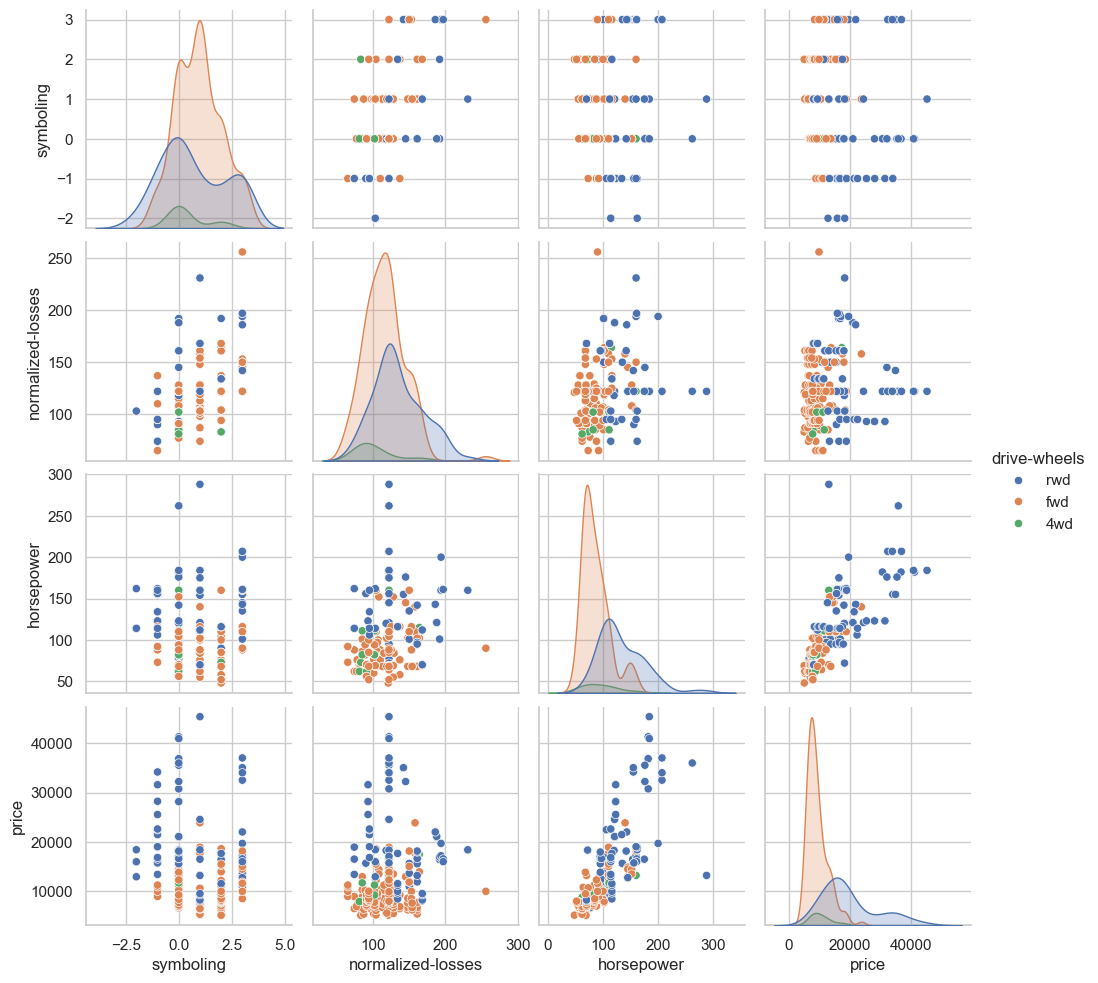

In [8]:
# Select a subset of interesting columns
cols_subset = ['symboling', 'normalized-losses', 'horsepower', 'price']

# Pair plot with hue based on 'drive-wheels'
sns.pairplot(df[cols_subset + ['drive-wheels']], hue='drive-wheels', height=2.5)
plt.show()

## 7. Categorical Plot (Bar Plot)
We can use bar plots to compare the average value of a variable across different categories.

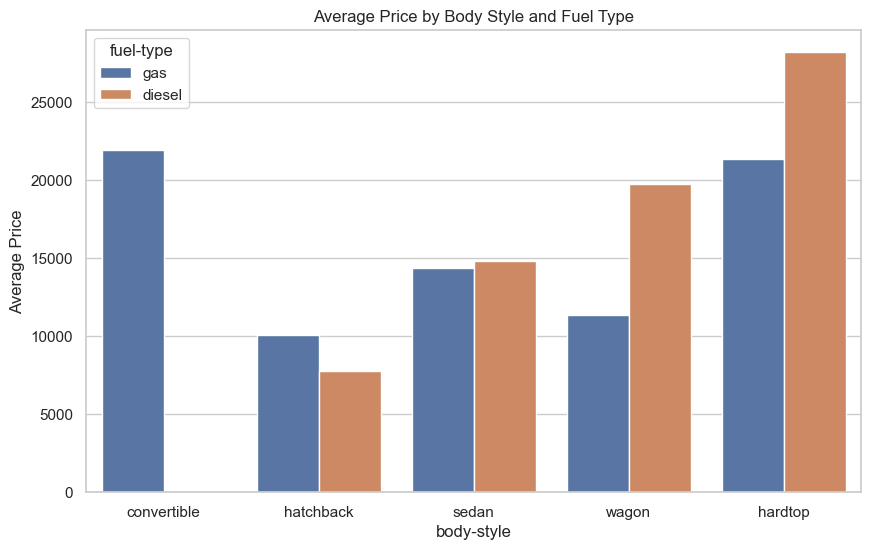

In [9]:
# Average Price by Body Style
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='body-style', y='price', hue='fuel-type', errorbar=None)
plt.title("Average Price by Body Style and Fuel Type")
plt.ylabel("Average Price")
plt.show()